In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import missingno as ms
import statistics as st
%matplotlib inline

In [10]:
path="final_raw.csv"

In [11]:
data=pd.read_csv(path)

In [12]:
data

,RelativeTimeMilliseconds,Clock,HR,Pulse,SpO2,awRR,NBP_Sys,NBP_Dia,NBP_Mean,NBP_Pulse,Temp,RR,Set RR,Num Patient Alarms,Num Technical Alarms
0,0,10:30,81.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,10,0,4
1,1000,10:30,80.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,10,0,3
2,2000,10:30,80.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,10,0,4
3,3000,10:30,79.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,10,0,4
4,4000,10:30,79.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,10,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,7303000,12:31,NaN,116.0,100.0,0.0,125.0,75.0,87.0,88.0,NaN,8,10,3,2
7304,7304000,12:31,NaN,116.0,100.0,0.0,125.0,75.0,87.0,88.0,NaN,8,10,3,2
7305,7305000,12:31,NaN,116.0,100.0,0.0,125.0,75.0,87.0,88.0,NaN,8,10,3,2
7306,7306000,12:31,NaN,116.0,100.0,0.0,125.0,75.0,87.0,88.0,NaN,8,10,3,2


In [15]:
heart_rate=data["HR"]
oxy=data["SpO2"]
systol=data["NBP_Sys"]
diastol=data["NBP_Dia"]
temp=data["Temp"]
resp=data["RR"]

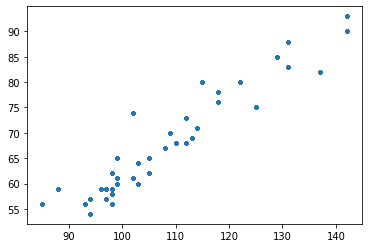

In [28]:
plt.scatter(systol,diastol,s=5)
plt.show()

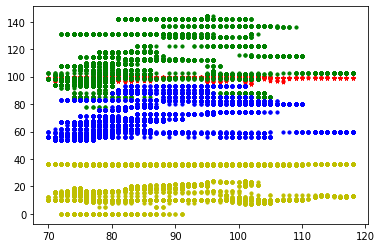

In [44]:
plt.scatter(heart_rate,oxy,s=10,c="r",marker='*')
plt.scatter(heart_rate,systol,s=10,c="g")
plt.scatter(heart_rate,diastol,s=10,c="b")
plt.scatter(heart_rate,temp,s=10,c="y")
plt.scatter(heart_rate,resp,s=10,c="y")
plt.show()

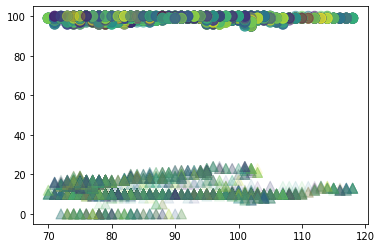

In [71]:
N=7308
colors = np.random.rand(N)
plt.scatter(heart_rate,resp,s=100,c=colors,marker='^',alpha=0.1)
plt.scatter(heart_rate,oxy,s=100,c=colors,marker='o',alpha=0.5)
plt.show()

<AxesSubplot:>

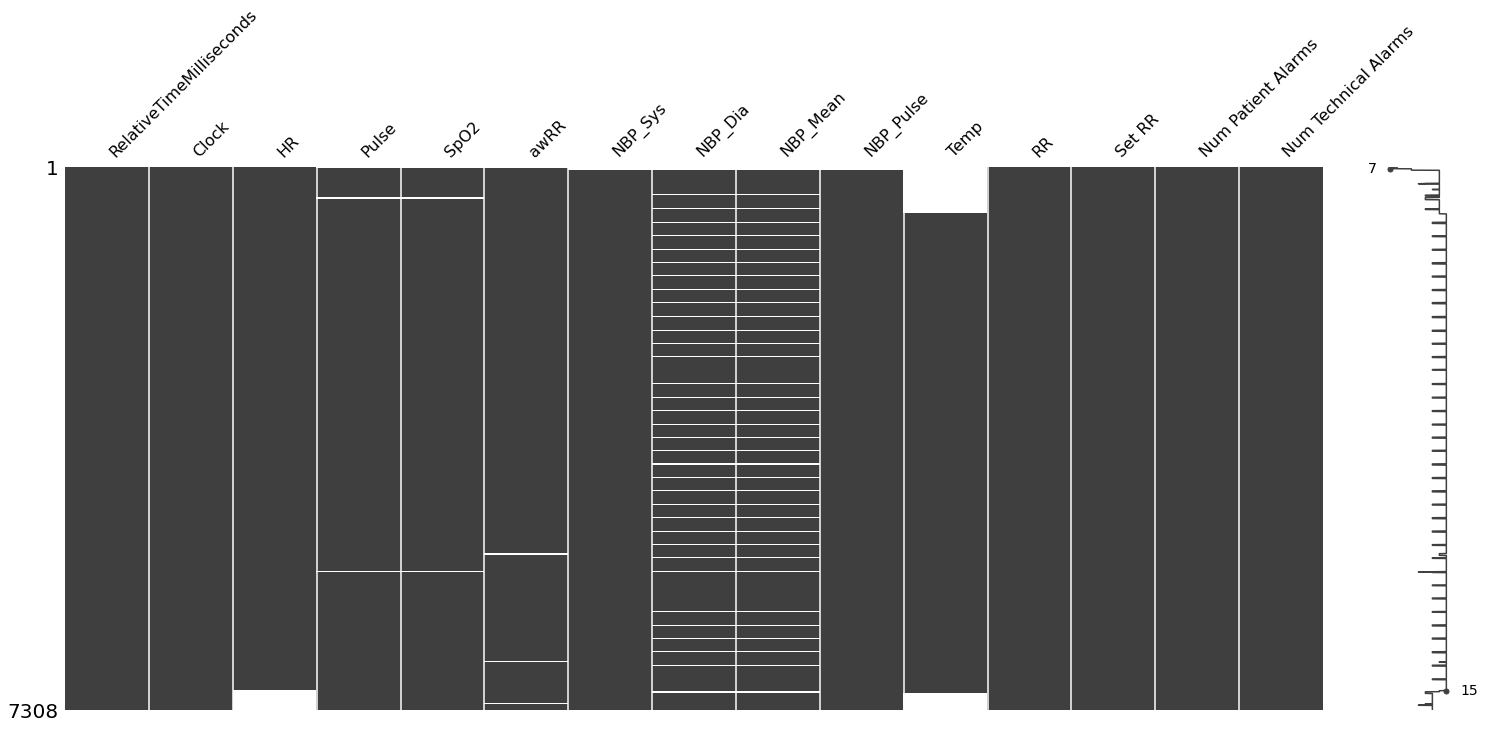

In [73]:
ms.matrix(data)

In [74]:
data.describe()

,RelativeTimeMilliseconds,HR,Pulse,SpO2,awRR,NBP_Sys,NBP_Dia,NBP_Mean,NBP_Pulse,Temp,RR,Set RR,Num Patient Alarms,Num Technical Alarms
count,7.308000e+03,7043.000000,7243.000000,7243.000000,7246.000000,7260.000000,6765.000000,6765.000000,7260.000000,6447.000000,7308.000000,7308.0,7308.000000,7308.000000
mean,3.653500e+06,83.998438,84.130195,99.072208,11.749517,108.798485,68.193792,77.699630,83.812121,35.959407,11.685824,10.0,0.250958,0.351943
std,2.109782e+06,9.912633,10.464101,0.736963,4.271471,14.427497,10.674190,11.588344,9.582608,0.073441,3.950471,0.0,0.601734,0.766302
min,0.000000e+00,70.000000,67.000000,95.000000,0.000000,78.000000,54.000000,62.000000,71.000000,35.300000,0.000000,10.0,0.000000,0.000000
25%,1.826750e+06,77.000000,77.000000,99.000000,10.000000,98.000000,59.000000,68.000000,78.000000,35.900000,10.000000,10.0,0.000000,0.000000
50%,3.653500e+06,81.000000,81.000000,99.000000,10.000000,105.000000,65.000000,75.000000,79.000000,36.000000,10.000000,10.0,0.000000,0.000000
75%,5.480250e+06,88.000000,88.500000,99.000000,15.000000,118.000000,76.000000,87.000000,88.000000,36.000000,15.000000,10.0,0.000000,0.000000
max,7.307000e+06,118.000000,125.000000,100.000000,36.000000,144.000000,93.000000,105.000000,105.000000,36.100000,24.000000,10.0,3.000000,5.000000


In [79]:
st.median(heart_rate)

81.0

In [80]:
st.mean(heart_rate)

nan

In [81]:
st.median(oxy)

99.0

In [82]:
data.median()

RelativeTimeMilliseconds    3653500.0
HR                               81.0
Pulse                            81.0
SpO2                             99.0
awRR                             10.0
NBP_Sys                         105.0
NBP_Dia                          65.0
NBP_Mean                         75.0
NBP_Pulse                        79.0
Temp                             36.0
RR                               10.0
Set RR                           10.0
Num Patient Alarms                0.0
Num Technical Alarms              0.0
dtype: float64